# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
pd.display

# Importing Dataset

In [ ]:
df = pd.read_csv('amazon_prime_titles.csv')
df.loc[0:90,'title']

0        The Grand Seduction
1       Take Care Good Night
2       Secrets of Deception
3         Pink: Staying True
4              Monster Maker
               ...          
86            Wipeout Canada
87         Wipeout Australia
88                 Winterset
89    Winds Of The Wasteland
90                      Wind
Name: title, Length: 91, dtype: object

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

# EDA ( Exploratory Data Analysis )

# removing columns

In [ ]:
df.drop('show_id',inplace=True,axis=1)

# changing the column name

In [ ]:
df.rename(columns={'listed_in':'Genres'},inplace=True) 

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


<Axes: xlabel='type', ylabel='count'>

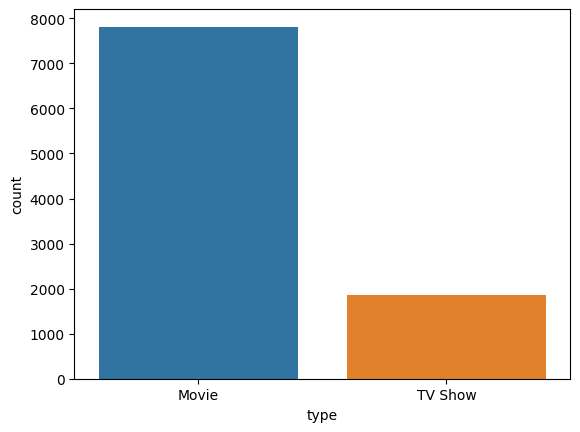

In [ ]:
# Checking for the value counts
sns.countplot(data=df,x='type') 

<Axes: xlabel='rating', ylabel='count'>

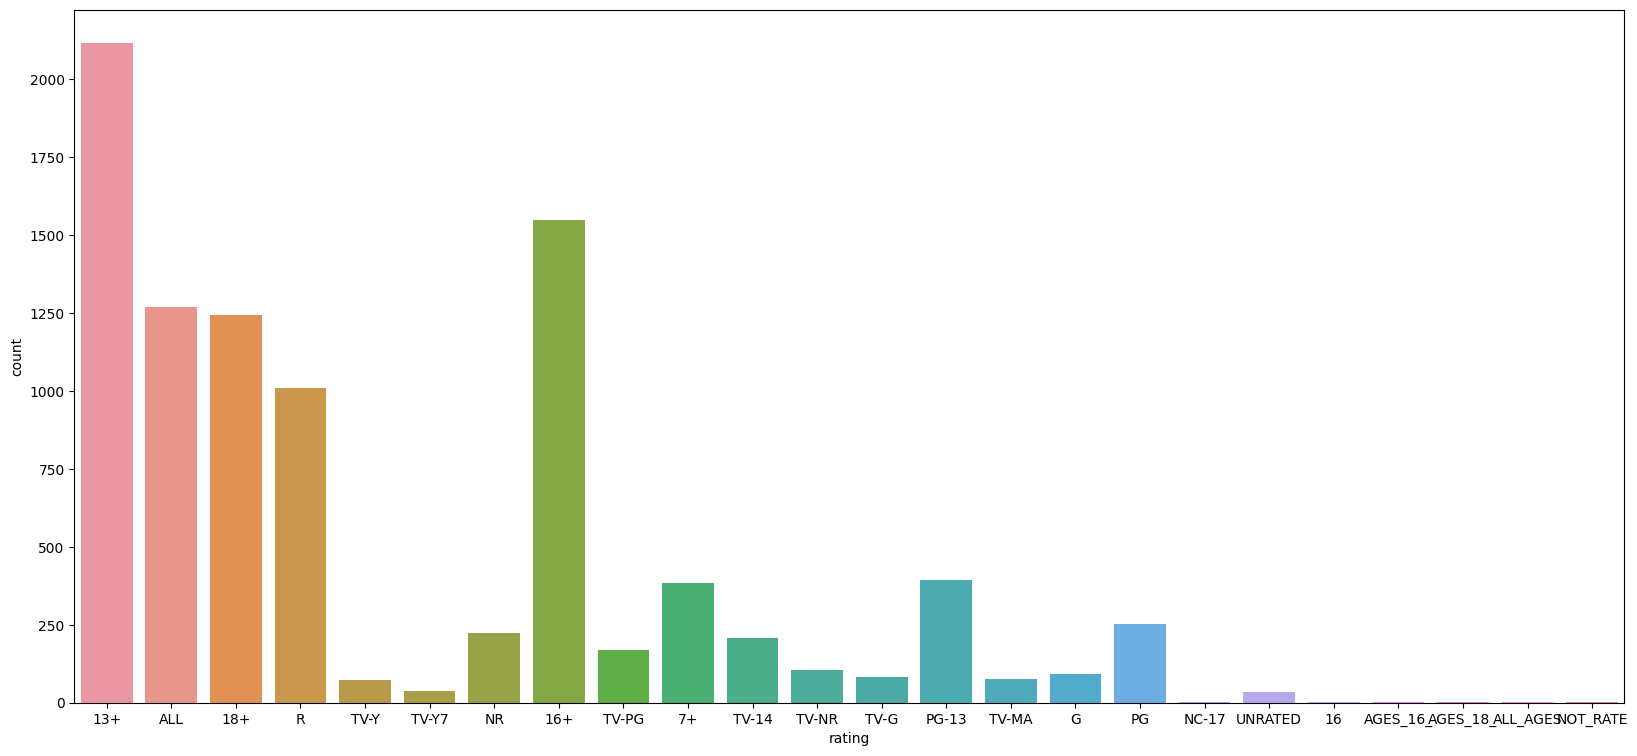

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(data=df,x='rating') 

In [ ]:
# replacing Null values using different method for different columns
df["cast"] = df["cast"].replace(np.nan , "Unknown")
df["director"] = df["director"].replace(np.nan , "Unknown")

In [ ]:
# replacing Null Values with mode
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [ ]:
df.isna().sum()

type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating             0
duration           0
Genres             0
description        0
dtype: int64

In [ ]:
df["date_added"]

0       March 30, 2021
1       March 30, 2021
2       March 30, 2021
3       March 30, 2021
4       March 30, 2021
             ...      
9663               NaN
9664               NaN
9665               NaN
9666               NaN
9667               NaN
Name: date_added, Length: 9668, dtype: object

In [ ]:
df.isna().sum()

type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating             0
duration           0
Genres             0
description        0
dtype: int64

In [ ]:
df.tail(30)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
9638,Movie,Oven,Kishore Tummala,Lauren Ojeda,NaN,NaN,2019,7+,2 min,Drama,A young mom's lapse in attention leads to a ca...
9639,Movie,No Sleep 'Til Christmas,Phil Traill,"Dave Annable, Odette Annable, Sheryl Lee Ralph...",NaN,NaN,2018,16+,85 min,Drama,Lizzie and Billy only fall asleep next to each...
9640,Movie,Meet the Spartans (Uncut),"Jason Friedberg, Aaron Setzer","Sean Maguire, Carmen Electra, Ken Davitian, Ke...",NaN,NaN,2008,18+,86 min,Comedy,From the creators of Scary Movie and Date Movi...
9641,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,NaN,2008,PG,116 min,"Comedy, Drama, Kids",Jennifer Aniston and Owen Wilson unleash huge ...
9642,TV Show,Lunkerville,Unknown,Michael de Avila,NaN,"October 10, 2021",2021,13+,2 Seasons,"Documentary, Special Interest, Sports","Lunkerville's launches ""Get Folks Fishing"", a ..."
9643,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,NaN,2010,R,112 min,"Comedy, Drama",A womanizing pfizer drug rep with no sense of ...
9644,Movie,Little Miss Sunshine,"Jonathan Dayton, Valerie Faris","Abigail Breslin, Greg Kinnear, Paul Dano, Alan...",United States,NaN,2006,R,103 min,"Comedy, Drama",A family determined to get their young daughte...
9645,TV Show,Let's Go Cozy Coupe! - Cartoons for Kids,Unknown,Unknown,NaN,NaN,2021,ALL,1 Season,Kids,Cozy Coupe is an online series that helps kids...
9646,Movie,Knight and Day (Extended Edition),20th_century_fox,"Tom Cruise, Cameron Diaz, Peter Sarsgaard, Jor...",NaN,NaN,2010,PG-13,117 min,"Action, Adventure, Comedy",SPECIAL EXTENDED EDITION! Get even MORE action...
9647,TV Show,Kids In The Hall,Unknown,Unknown,NaN,"October 10, 2021",1995,TV-14,5 Seasons,"Arts, Entertainment, and Culture, Comedy","""The Kids in the Hall"" is a unique and bizarre..."


In [ ]:
df.rating.unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [ ]:
df["date_added"] = df["date_added"].fillna("January 01, {}".format(str(df["release_year"].mode()[0])))

months = {'January':1 , 'February':2 , 'March':3 , 'April':4 , 'May':5 , 'June':6 , 'July':7 , 'August':8 , 
          'September':9 , 'October':10 , 'November':11 , 'December':12}

date_list = []

for i in df["date_added"]:
    str1= re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+' , i)
    str2= re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+' , i)
    str3= re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)' , i)
    dates = '{}-{}-{}'.format(str2[0] , months[str1[0]] , str3[0])
    date_list.append(dates)
df["date_added_cleaned"] = date_list
df['date_added_cleaned']=df['date_added_cleaned'].astype('datetime64[ns]')

<Axes: >

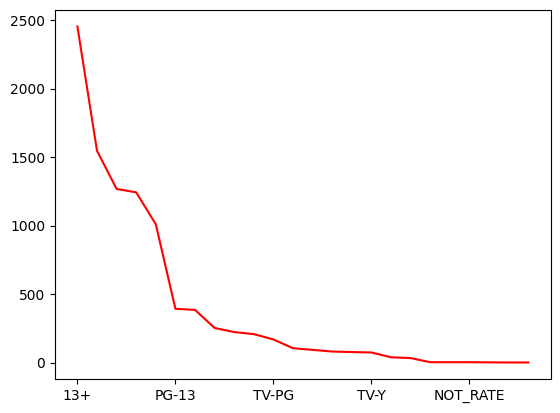

In [ ]:
# To find the most popular rating category

df["rating"].value_counts().plot(color = "red")

In [ ]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description,date_added_cleaned
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,"January 01, 2021",1940,7+,60 min,Comedy,New York City street principles get an East Si...,2021-01-01
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,"January 01, 2021",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",2021-01-01
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,"January 01, 2021",2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",2021-01-01
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,"January 01, 2021",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",2021-01-01
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,"January 01, 2021",2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",2021-01-01


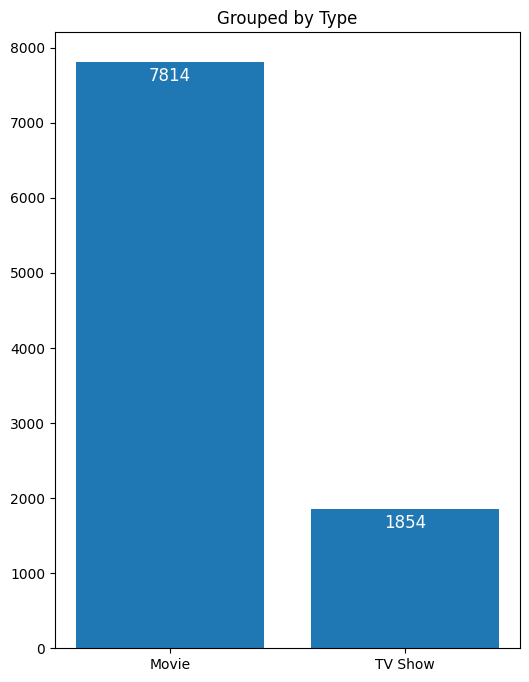

In [ ]:
plt.figure(figsize=(6,8))
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values)
plt.title('Grouped by Type')
# plt.xticks([0,1],['Movies', 'TV Shows'])

#show the text detail
for i, value in enumerate(df['type'].value_counts().values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='top')
plt.show()

In [ ]:
listed_count = df['Genres'].value_counts()
listed_count

Drama                                                                            986
Comedy                                                                           536
Drama, Suspense                                                                  399
Comedy, Drama                                                                    377
Animation, Kids                                                                  356
                                                                                ... 
Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest      1
Arts, Entertainment, and Culture, Comedy, Military and War                         1
Comedy, Faith and Spirituality, Kids                                               1
Arts, Entertainment, and Culture, Fantasy, Kids                                    1
Anime, Comedy, Drama                                                               1
Name: Genres, Length: 518, dtype: int64

In [ ]:
# Convert NaN values to empty strings
df['description'] = df['description'].fillna('')

In [ ]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
# Create a matrix of TF-IDF features
tfidf_matrix = tfidf.fit_transform(df['description'])

In [ ]:
# Calculate the cosine similarity between all pairs of movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Define a function that returns the 10 most similar movies using content-based filtering
def content_based_recommendations(title):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]

    # Calculate the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    # Return the 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
# Define a function that returns the 10 most similar movies using collaborative filtering
def collaborative_filtering_recommendations(title):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]

    # Calculate the pairwise similarity scores between all movies and the target movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    # Return the 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
# Define a function that combines the results of content-based and collaborative filtering
def hybrid_recommendations(title):
    content_based_movies = content_based_recommendations(title)
    collaborative_filtering_movies = collaborative_filtering_recommendations(title)

    # Combine the results and remove duplicates
    hybrid_movies = pd.concat([content_based_movies, collaborative_filtering_movies])
    hybrid_movies = hybrid_movies.drop_duplicates()

    return hybrid_movies[:10]

In [ ]:
# Recommending movies
print(hybrid_recommendations('Star Trek: Voyager'))

8979                  Gamma smoke test
906     Star Trek: The Next Generation
8415               X-Ray 1C Test Title
9314                              Naam
4815                           Hellkat
3798                   No Greater Love
1167                     Rich Africans
5091                  The Purple Night
9197      Flight Of The Phoenix (2004)
6767                      Nalla Thambi
Name: title, dtype: object


In [ ]:
import streamlit as st
import pickle

In [ ]:
pickle.dump(df, open("movies.pkl", "wb"))


In [ ]:
pickle.dump(cosine_sim, open("similarity.pkl", "wb"))

In [ ]:

movies_list = pickle.load(open("movies.pkl", "rb"))

movies_list_title = movies_list["title"].values

similarity = pickle.load(open("similarity.pkl", "rb"))


def recommend(movie):
    movie_index = movies_list[movies_list["title"] == movie].index[0]
    distances = similarity[movie_index]
    sorted_movie_list = sorted(list(enumerate(distances)), reverse=True,
                               key=lambda x:x[1])[1:6]

    recommended_movies = []
    recommended_posters = []
    for i in sorted_movie_list:
        poster_path = movies_list["poster_path"][i[0]]
        recommended_movies.append(movies_list.iloc[i[0]].title)
        recommended_posters.append("https://image.tmdb.org/t/p/original"+poster_path)

    return recommended_movies,  recommended_posters



# Create title for your stream lit page
st.title("Project Movie Recommender System")

# Create a input box for movies name 
selected_movie_name = st.selectbox(
    "What is the movie name?",
    movies_list_title
)

# create a recommend button with function of displaying recommended movies and movie posters
if st.button("Recommend"):
    recommendation, movie_posters = hybrid_recommendations(selected_movie_name)

    col1, col2, col3, col4, col5 = st.columns(5)

    with col1:
        st.write(recommendation[0])
        st.image(movie_posters[0])
    with col2:
        st.write(recommendation[1])
        st.image(movie_posters[1])
    with col3:
        st.write(recommendation[2])
        st.image(movie_posters[2])
    with col4:
        st.write(recommendation[3])
        st.image(movie_posters[3])
    with col5:
        st.write(recommendation[4])
        st.image(movie_posters[4])
